In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading results .csv

First, we open the csv

In [3]:
data = pd.read_csv("./results/experiment_stages.csv", index_col=0)

In [4]:
data

,arm_name,metric_name,mean,sem,trial_index
0,0_0,error,0.457100,0.0,0
1,0_1,error,0.320413,0.0,0
2,0_0,weight,0.542536,0.0,0
3,0_1,weight,0.640788,0.0,0
4,0_0,ram,0.569782,0.0,0
5,0_1,ram,0.607118,0.0,0
6,0_0,latency,0.200873,0.0,0
7,0_1,latency,0.357210,0.0,0
8,1_0,error,0.377003,0.0,1
9,1_1,error,0.382500,0.0,1


## Reoder by arm

We need to reorder it to be able to group different performances in one row and by arm

In [5]:
data_use = data.pivot(columns='metric_name', values='mean',
                         index='arm_name')

In [6]:
data_use

metric_name,error,latency,ram,weight
arm_name,,,,
0_0,0.457100,0.200873,0.569782,0.542536
0_1,0.320413,0.357210,0.607118,0.640788
1_0,0.377003,0.577749,0.629400,0.621621
1_1,0.382500,0.602842,0.627571,0.609311
2_0,0.431992,0.527429,0.599145,0.600514
2_1,0.329432,0.280808,0.587258,0.595816
3_0,0.397400,0.144525,0.528319,0.452919
3_1,0.437500,0.692647,0.641643,0.656209
4_0,0.364283,0.176210,0.558407,0.582400


## DeStandardize

As we can see results are grouped by arm but we have a problem, they are still in relative values. SpArSeMoD uses sntardardizers internally to place the performance metrics in the same range (approx [0, 1]). To ungroup them we must know the standardization procedure, which is 

$$
standardized value = \frac{\log(real value)}{\log(standardization value)}
$$

where the standardization value depends on the metric.

+ Model Size: $10^8$
+ Working memory $10^8$
+ Latency $10^4$

Hence to recover the original value we have to isolate the real value in the last equation and we will obtain real values for all these metrics. Accuracy has no standardization. With this we will recover the number of parameters.

Then depending that we consider if 8 bit data types or 32-float, we will use a different conversion.

In the case or model size ('weight') and working memory ('ram'), we can proceed to suppose that they are 8-bit parameters and convert them to kilobytes, by dividing by 1024.



In [7]:
data_use['real_weight'] = np.exp(data_use['weight']*np.log(10**8))*8/8/1024
data_use['real_ram'] = np.exp(data_use['ram']*np.log(10**8))*8/8/1024
data_use['real_latency'] = np.exp(data_use['latency']*np.log(10**4) + 1)

In [8]:
data_use

metric_name,error,latency,ram,weight,real_weight,real_ram,real_latency
arm_name,,,,,,,
0_0,0.457100,0.200873,0.569782,0.542536,21.378906,35.314453,17.289598
0_1,0.320413,0.357210,0.607118,0.640788,130.617188,70.250000,72.968538
1_0,0.377003,0.577749,0.629400,0.621621,91.762695,105.900391,556.278673
1_1,0.382500,0.602842,0.627571,0.609311,73.145508,102.392578,700.913523
2_0,0.431992,0.527429,0.599145,0.600514,62.203125,60.654297,349.952214
2_1,0.329432,0.280808,0.587258,0.595816,57.046875,48.726562,36.101603
3_0,0.397400,0.144525,0.528319,0.452919,4.102539,16.453125,10.289512
3_1,0.437500,0.692647,0.641643,0.656209,173.528320,132.691406,1602.809090
4_0,0.364283,0.176210,0.558407,0.582400,44.555664,28.638672,13.776422


## Pareto frontier

However, now we have all the result most of them do not interest us, since we only want the Pareto front. For this we have thw following function, that returns the pareto front

In [9]:
from sparsemod.heir import is_pareto_efficient

In [10]:
pareto_mask = is_pareto_efficient(data_use.values)
pareto_arms = data_use.index[pareto_mask].values

We then sort the vlaues, for example, by accuracy

In [11]:
data_use[pareto_mask].sort_values(by ='error')

metric_name,error,latency,ram,weight,real_weight,real_ram,real_latency
arm_name,,,,,,,
0_1,0.320413,0.357210,0.607118,0.640788,130.617188,70.250000,72.968538
2_1,0.329432,0.280808,0.587258,0.595816,57.046875,48.726562,36.101603
4_0,0.364283,0.176210,0.558407,0.582400,44.555664,28.638672,13.776422
3_0,0.397400,0.144525,0.528319,0.452919,4.102539,16.453125,10.289512
5_0,0.453726,0.122555,0.571898,0.464678,5.094727,36.718750,8.404588


Where we can see that the best model has a total accuracy of accuracy = (1- error) = 1 - 0.441 = 0.559, a model sie of 112KB in 8-bit vlaues, a RAM of 72 KB and a latency of 221 ms.

### Pareto Front and evolution

We can visualize the frontier obtained by Sparse

Text(0.5, 0, 'Error')

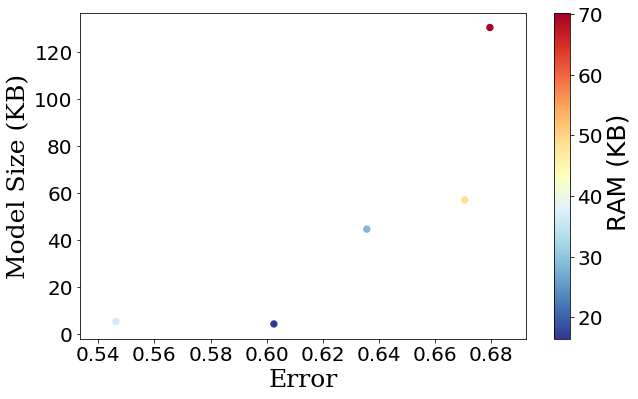

In [12]:
plt.figure(figsize=(10,6))
cm = plt.cm.get_cmap('RdYlBu_r')
sc = plt.scatter(1-data_use[pareto_mask].sort_values(by ='error')['error'],
         data_use[pareto_mask].sort_values(by ='error')['real_weight'],
           c=data_use[pareto_mask].sort_values(by ='error')['real_ram'], s=40, cmap=cm)



cb = plt.colorbar(sc)
cb.ax.tick_params(labelsize=20)
cb.ax.set_ylabel(" RAM (KB)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Model Size (KB)", fontsize=25, fontfamily='serif')
plt.xlabel("Error", fontsize=25, fontfamily='serif')


as well as the evolution

Text(0.5, 0, 'Error')

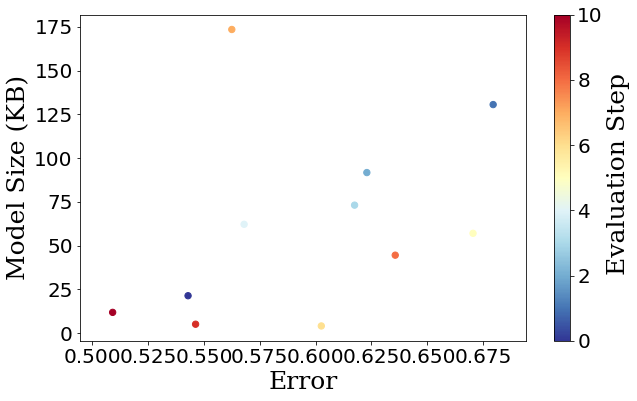

In [13]:
data_use['arm'] = data_use.index
data_use['arm'] = data_use['arm'].apply(lambda x: int(x.split("_")[0]))
data_use.sort_values(by='arm')

plt.figure(figsize=(10,6))
cm = plt.cm.get_cmap('RdYlBu_r')
sc = plt.scatter(1 - data_use.sort_values(by='arm')['error'],
         data_use.sort_values(by='arm')['real_weight'],
           c=range(len(data_use.sort_values(by='arm'))), s=40, cmap=cm)



cb = plt.colorbar(sc)
cb.ax.tick_params(labelsize=20)
cb.ax.set_ylabel(" Evaluation Step", fontsize=25, fontfamily='serif')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Model Size (KB)", fontsize=25, fontfamily='serif')
plt.xlabel("Error", fontsize=25, fontfamily='serif')


# Inspecting an arm

In the performance lookup we saw that the bet arm was `749_0`. As we want the specific configuration to build the network we need to observe the specific parameters. For this we have to load a Sparse experiment. in `./cnn_cost_example/read_experiment/` a function has been built for that purpose

In [14]:
from read_experiment import load_experiment

In [16]:
exp, data = load_experiment(data_folder="../data/data_cifar2/")

In [17]:
exp.arms_by_name['0_1']

Arm(name='0_1', parameters={'downsample_input_depth_1': 0, 'input_downsampling_rate_1': 4, 'downsample_input_depth_2': 1, 'input_downsampling_rate_2': 3, 'num_conv_blocks': 2, 'conv_1_num_layers': 3, 'conv_1_layer_1_filters': 3, 'conv_1_layer_2_filters': 11, 'conv_1_layer_3_filters': 87, 'conv_1_layer_1_kernel': 3, 'conv_1_layer_2_kernel': 3, 'conv_1_layer_3_kernel': 4, 'conv_1_layer_1_type': 1, 'conv_1_layer_2_type': 1, 'conv_1_layer_3_type': 1, 'conv_1_layer_1_downsample': 0.15470579219982028, 'conv_1_layer_2_downsample': 0.15037421323359013, 'conv_1_layer_3_downsample': 0.49799395725131035, 'conv_2_num_layers': 2, 'conv_2_layer_1_filters': 65, 'conv_2_layer_2_filters': 44, 'conv_2_layer_3_filters': 50, 'conv_2_layer_1_kernel': 5, 'conv_2_layer_2_kernel': 5, 'conv_2_layer_3_kernel': 3, 'conv_2_layer_1_type': 2, 'conv_2_layer_2_type': 0, 'conv_2_layer_3_type': 1, 'conv_2_layer_1_downsample': 0.025690853595733643, 'conv_2_layer_2_downsample': 0.13985366141423583, 'conv_2_layer_3_downsa